<a href="https://colab.research.google.com/github/Eaglesight02/Pheonix_Squadron/blob/wing_0/Copy_2_of_Diabetic_Retinopathy_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Getting the data and uploading it into our google drive.


In [1]:
# Mounting the google drive(Of Pheonix Squadron)

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# # Uploading the 'kaggle.json' file.

# from google.colab import files
# uploaded = files.upload()

In [ ]:
# # Moving the 'kaggle.json' file to the '/root/kaggle' folder.

# !mkdir ~/.kaggle
# !mv kaggle.json ~/.kaggle/kaggle.json

In [ ]:
# # Authentication of the kaggle api key.

# from kaggle.api.kaggle_api_extended import KaggleApi

# api = KaggleApi()
# api.authenticate()

In [ ]:
# # Downloading the dataset

# !kaggle datasets download -d andrewmvd/retinal-disease-classification

In [ ]:
# # Extracting the zip file.

# import zipfile
# with zipfile.ZipFile('/content/retinal-disease-classification.zip','r') as zip_ref:
#   zip_ref.extractall('Diabetic Retinopathy')

In [ ]:
# # Removing the zipfile.

# import os
# os.remove('/content/retinal-disease-classification.zip')

In [ ]:
# # Moving the extracted files into our google drive.

# import shutil
# source = '/content/Diabetic Retinopathy'
# destination = '/content/drive/MyDrive'
# shutil.move(source,destination)

### 2. Setting the Paths.

In [2]:
import os

In [3]:
Data_path = '/content/drive/MyDrive/Diabetic Retinopathy'

In [4]:
Training_set = os.path.join(Data_path,'Training_Set','Training_Set')
Testing_set = os.path.join(Data_path,'Test_Set','Test_Set')
Validation_set = os.path.join(Data_path,'Evaluation_Set','Evaluation_Set')

In [5]:
Training_set

'/content/drive/MyDrive/Diabetic Retinopathy/Training_Set/Training_Set'

In [6]:
Testing_set

'/content/drive/MyDrive/Diabetic Retinopathy/Test_Set/Test_Set'

In [7]:
Validation_set

'/content/drive/MyDrive/Diabetic Retinopathy/Evaluation_Set/Evaluation_Set'

In [8]:
Training_images = os.path.join(Training_set,'Training/')
Testing_images = os.path.join(Testing_set,'Test/')
Validation_images = os.path.join(Validation_set,'Validation/')

In [9]:
Training_images

'/content/drive/MyDrive/Diabetic Retinopathy/Training_Set/Training_Set/Training/'

In [10]:
Testing_images

'/content/drive/MyDrive/Diabetic Retinopathy/Test_Set/Test_Set/Test/'

In [11]:
Validation_images

'/content/drive/MyDrive/Diabetic Retinopathy/Evaluation_Set/Evaluation_Set/Validation/'

In [12]:
Training_labels = os.path.join(Training_set,'RFMiD_Training_Labels.csv')
Testing_labels = os.path.join(Testing_set,'RFMiD_Testing_Labels.csv')
Validation_labels = os.path.join(Validation_set,'RFMiD_Validation_Labels.csv')

In [13]:
Training_labels

'/content/drive/MyDrive/Diabetic Retinopathy/Training_Set/Training_Set/RFMiD_Training_Labels.csv'

In [14]:
Testing_labels

'/content/drive/MyDrive/Diabetic Retinopathy/Test_Set/Test_Set/RFMiD_Testing_Labels.csv'

In [15]:
Validation_labels

'/content/drive/MyDrive/Diabetic Retinopathy/Evaluation_Set/Evaluation_Set/RFMiD_Validation_Labels.csv'

### 3. Importing the necessary modules and reading the labels: 

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import cv2
import random
from keras.preprocessing.image import ImageDataGenerator

In [18]:
Train_df = pd.read_csv(Training_labels)
Test_df = pd.read_csv(Testing_labels)
Val_df = pd.read_csv(Validation_labels)

### 4. Basic EDA

In [19]:
Train_df.head()

,ID,Disease_Risk,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,...,CME,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
Test_df.head()

,ID,Disease_Risk,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,...,CME,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL
0,1,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
Val_df.head()

,ID,Disease_Risk,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,...,CME,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL
0,1,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
Train_df.drop(columns=Train_df.columns[3:],axis=1,inplace=True)
Test_df.drop(columns=Test_df.columns[3:],axis=1,inplace=True)
Val_df.drop(columns=Val_df.columns[3:],axis=1,inplace=True)

In [23]:
Train_df.drop(columns=['Disease_Risk'],axis=1,inplace=True)
Test_df.drop(columns=['Disease_Risk'],axis=1,inplace=True)
Val_df.drop(columns=['Disease_Risk'],axis=1,inplace=True)

In [24]:
Train_df.head()

,ID,DR
0,1,1
1,2,1
2,3,1
3,4,0
4,5,1


In [25]:
Test_df.head()

,ID,DR
0,1,1
1,2,1
2,3,1
3,4,0
4,5,0


In [26]:
Val_df.head()

,ID,DR
0,1,1
1,2,0
2,3,0
3,4,0
4,5,0


In [27]:
Train_df.describe()

,ID,DR
count,1920.000000,1920.000000
mean,960.500000,0.195833
std,554.400577,0.396944
min,1.000000,0.000000
25%,480.750000,0.000000
50%,960.500000,0.000000
75%,1440.250000,0.000000
max,1920.000000,1.000000


In [28]:
Val_df.describe()

,ID,DR
count,640.000000,640.000000
mean,320.500000,0.206250
std,184.896367,0.404929
min,1.000000,0.000000
25%,160.750000,0.000000
50%,320.500000,0.000000
75%,480.250000,0.000000
max,640.000000,1.000000


In [29]:
Train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      1920 non-null   int64
 1   DR      1920 non-null   int64
dtypes: int64(2)
memory usage: 30.1 KB


In [30]:
Val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      640 non-null    int64
 1   DR      640 non-null    int64
dtypes: int64(2)
memory usage: 10.1 KB


In [31]:
Train_df.isna().sum()

ID    0
DR    0
dtype: int64

In [32]:
Val_df.isna().sum()

ID    0
DR    0
dtype: int64

### 5. Getting the file paths for the images.

In [33]:
Train_df['filepath'] = Train_df['ID'].apply(lambda x: Training_images + str(x) + '.png')
Val_df['filepath'] = Val_df['ID'].apply(lambda x: Validation_images + str(x) + '.png')
Test_df['filepath'] = Test_df['ID'].apply(lambda x: Testing_images + str(x) + '.png')

In [34]:
Train_df['filepath'][0]

'/content/drive/MyDrive/Diabetic Retinopathy/Training_Set/Training_Set/Training/1.png'

In [35]:
Val_df['filepath'][0]

'/content/drive/MyDrive/Diabetic Retinopathy/Evaluation_Set/Evaluation_Set/Validation/1.png'

In [36]:
Test_df['filepath'][0]

'/content/drive/MyDrive/Diabetic Retinopathy/Test_Set/Test_Set/Test/1.png'

### 6. Sample Images

In [37]:
Train_df['DR'].value_counts()

0    1544
1     376
Name: DR, dtype: int64

In [38]:
Val_df['DR'].value_counts()

0    508
1    132
Name: DR, dtype: int64

In [ ]:
ax = sns.countplot(x='DR',data=Train_df)
for p in ax.patches:
  ax.annotate(f'{p.get_height()}',(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',va='bottom')

plt.show()

Display Random Images


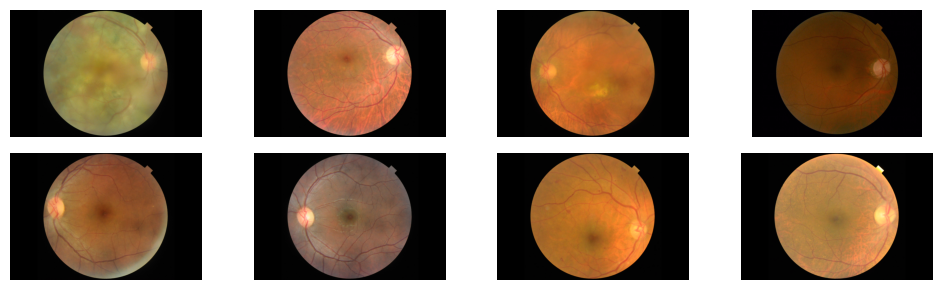

In [42]:
# Getting random eye images from the Train Image paths
random_eye_images = [np.random.choice(Train_df['filepath']) for i in range(8)]

print("Display Random Images")

# Setting the figure size to 20px horizontally and 10px vertically.
plt.figure(figsize=(10, 3))

# Plotting 9 random images of the eyes.
for i in range(8):
  plt.subplot(2, 4, i+1)                # plt.subplot(nrows, ncols, index) nrows: no.of rows, ncols: no.of cols, index: selecting the subplot.
  img = plt.imread(random_eye_images[i])  # Reading the image using plt.imread function.
  plt.imshow(img)                         # Showing the images by plotting them.
  plt.axis('off')                         # Not taking the axis.
  
plt.tight_layout()                        # Used to adjust padding between the subplots.

### 7. ImageDataGenerator

In [ ]:
"""datagen = ImageDataGenerator(
    rescale = 1.0/255.0,
    rotation_range = 10,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    validation_split = 0.2
)"""

In [43]:
Train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        1920 non-null   int64 
 1   DR        1920 non-null   int64 
 2   filepath  1920 non-null   object
dtypes: int64(2), object(1)
memory usage: 45.1+ KB


In [ ]:
# import random
# temp =[]
# for i in range(len(diseased_Eyes)):
#   temp.append(healthy_Eyes.iloc[random.choice(range(len(diseased_Eyes))), :])
# demo = pd.DataFrame(temp, columns = healthy_Eyes.columns)

In [46]:
from sklearn.utils import shuffle
def balance_Data(data, feature):
  class_01 = data[data[feature] == 1]
  class_00 = data[data[feature] == 0]
  return shuffle(pd.concat([class_01, class_00.sample(n = round(1.5 * len(class_01)))]))

In [47]:
bal_Train_Data = balance_Data(Train_df, 'DR')

In [50]:
bal_Train_Data['DR'].value_counts()

0    564
1    376
Name: DR, dtype: int64

In [51]:
# Load and preprocess the grayscale images
from PIL import Image

def img2Gray(image_Paths):
  gray_Images = []

  for image_Path in image_Paths:
      gray_Image = Image.open(image_Path).convert('L').resize((224, 224))
      gray_Array = np.array(gray_Image)
      norm_Array = gray_Array / 255.0
      reshaped_Array = norm_Array.reshape(224, 224, 1)
      gray_Images.append(reshaped_Array)
      
  gray_Images = np.array(gray_Images)
  return gray_Images

In [53]:
train_Features = img2Gray(bal_Train_Data['filepath'])

In [54]:
train_Targets = bal_Train_Data['DR']

In [55]:
# Create the CNN model
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Activation, Flatten

model = Sequential([
    Conv2D(32, (3, 3), activation = 'relu', input_shape = (224, 224, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation = 'relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation = 'relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation = 'relu'),
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Recall'])

# Train the model
history = model.fit(train_Features, train_Targets, epochs = 10, batch_size = 32 )

Epoch 1/10
30/30 [==============================] - 15s 59ms/step - loss: 0.6947 - recall: 0.0479
Epoch 2/10
30/30 [==============================] - 1s 41ms/step - loss: 0.6732 - recall: 0.0000e+00
Epoch 3/10
30/30 [==============================] - 1s 41ms/step - loss: 0.6766 - recall: 0.0000e+00
Epoch 4/10
30/30 [==============================] - 1s 41ms/step - loss: 0.6635 - recall: 0.1011
Epoch 5/10
30/30 [==============================] - 1s 43ms/step - loss: 0.6690 - recall: 0.2021
Epoch 6/10
30/30 [==============================] - 1s 43ms/step - loss: 0.6366 - recall: 0.2926
Epoch 7/10
30/30 [==============================] - 1s 43ms/step - loss: 0.6454 - recall: 0.1596
Epoch 8/10
30/30 [==============================] - 1s 41ms/step - loss: 0.6388 - recall: 0.2500
Epoch 9/10
30/30 [==============================] - 1s 40ms/step - loss: 0.6392 - recall: 0.2793
Epoch 10/10
30/30 [==============================] - 1s 40ms/step - loss: 0.6426 - recall: 0.0479


In [56]:
val_Array = img2Gray(Val_df['filepath'])

In [57]:
# Evaluate the model on the test set
val_loss, val_acc = model.evaluate(val_Array, Val_df['DR'])
print('Validation accuracy:', val_acc)

20/20 [==============================] - 1s 17ms/step - loss: 0.5496 - recall: 0.0833
Validation accuracy: 0.0833333358168602


In [64]:
test_Array = img2Gray(Test_df['filepath'])

In [65]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_Array, Test_df['DR'])
print('Test accuracy:', test_acc)

20/20 [==============================] - 0s 16ms/step - loss: 0.5551 - recall: 0.0726
Test accuracy: 0.07258064299821854


In [58]:
val_Predictions = model.predict(val_Array)

20/20 [==============================] - 1s 19ms/step


In [59]:
np.mean(val_Predictions)

0.37005475

In [60]:
val_Predictions_Bin = []
for prediction in val_Predictions:
  val_Predictions_Bin.append(0) if prediction <= np.mean(val_Predictions) else val_Predictions_Bin.append(1)

In [ ]:
# val_Predictions_Bin = pd.DataFrame(np.argmax(val_Predictions, axis = 1))

In [61]:
pd.DataFrame(val_Predictions_Bin).value_counts()

1    414
0    226
dtype: int64

In [62]:
Val_df['DR'].value_counts()

0    508
1    132
Name: DR, dtype: int64

In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, classification_report
confusion_matrix(val_Predictions_Bin, Val_df['DR'])

array([[197,  29],
       [311, 103]])

In [66]:
from google.colab import files
uploaded = files.upload()

Saving 1.png to 1.png


In [67]:
image_Path = '/content/1.png'

In [ ]:
plt.figure(figsize = (10, 3))
Image.open(image_Path)

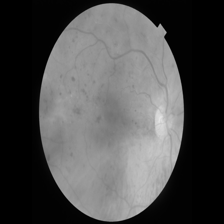

In [72]:
Image.open(image_Path).convert('L').resize((224, 224))

In [76]:
path_List = [image_Path]

In [88]:
print(f"Probability of Having Diabetic Retinopathy : {model.predict(img2Gray(path_List))[0][0]*100 : .2f} %")

1/1 [==============================] - 0s 36ms/step
Probability of Having Diabetic Retinopathy :  38.05 %


In [ ]:
# import os
# import pandas as pd
# import numpy as np
# from PIL import Image
# from sklearn.model_selection import train_test_split
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
# from keras.utils import to_categorical

# # Set the image directory and DataFrame containing image paths and labels
# image_directory = '/content/tuberculosis-chest-xrays-shenzhen/images/images'


# # Load the DataFrame containing image paths and labels
# dataframe =combined_df

# # Preprocess the images and labels
# # ...

# # Build and train the model
# # ...

# # Load and preprocess test images
# test_image_paths = ['/content/tuberculosis-chest-xrays-shenzhen/images/images/CHNCXR_0008_0.png', '/content/tuberculosis-chest-xrays-shenzhen/images/images/CHNCXR_0011_0.png']
# test_images = []

# """for image_path in test_image_paths:
#     # Open and resize the image to 224x224
#     image = Image.open(image_path).convert('L').resize((224, 224))
    
#     # Convert the image to a NumPy array
#     image_array = np.array(image)
    
#     # Expand the dimensions to (224, 224, 1)
#     image_array = np.expand_dims(image_array, axis=-1)
    
#     # Normalize the image array
#     image_array = image_array / 255.0
    
#     # Append the preprocessed image to the list
#     test_images.append(image_array)

# # Convert the test images to a NumPy array
# test_images = np.array(test_images)"""

# # Make predictions on the test images
# predictions = model.predict(test_images)

# # Map the predicted labels to their respective class names
# class_names = ['class0', 'class1', ...]  # Replace with your actual class names
# predicted_labels = np.argmax(predictions, axis=1)
# predicted_class_names = [class_names[label] for label in predicted_labels]

# # Print the predicted class names for the test images
# for image_path, predicted_class in zip(test_image_paths, predicted_class_names):
#     print(f'{image_path}: {predicted_class}')